<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pandas" data-toc-modified-id="Pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pandas</a></span><ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Series</a></span></li><li><span><a href="#Dataframe" data-toc-modified-id="Dataframe-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dataframe</a></span></li><li><span><a href="#Sorting" data-toc-modified-id="Sorting-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sorting</a></span></li></ul></li></ul></div>

# Pandas

## Series

In [8]:
import pandas as pd
import numpy as np

s = pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print(s.index)

a    0.898092
b    0.786858
c    0.485292
d    0.675586
e    0.056117
dtype: float64
Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')


In [16]:
# without passing any index, it will start series at zero
s = pd.Series(np.random.rand(5))
print(s)
print(s.index)

0    0.947126
1    0.126262
2    0.741399
3    0.602605
4    0.452433
dtype: float64
RangeIndex(start=0, stop=5, step=1)


In [10]:
# Using dictionary to create
d = {'a': 0., 'b': 1., 'c': 2.}
s = pd.Series(d)
print(s)
print(s.index)

a    0.0
b    1.0
c    2.0
dtype: float64
Index([u'a', u'b', u'c'], dtype='object')


In [14]:
s = pd.Series(
    d, index=[
        'b', 'c', 'd', 'a'
    ])  # 'd' is not available as key in dictionary, hence it will give NaN
print(s)
print(s.index)

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64
Index([u'b', u'c', u'd', u'a'], dtype='object')


In [15]:
s = pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])
print(s)
print(s.index)

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64
Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')


In [26]:
# without passing any index, it will start series at zero
s = pd.Series(np.random.rand(5))

print(s[0])

0.4266280792883901


In [24]:
print(s[:3])

0    0.515496
1    0.388000
2    0.881845
dtype: float64


In [25]:
print("Median=", s.median())

('Median=', 0.5154955755163649)


In [28]:
print(s[
    s > s.median()])  # printing values which are greater than median of series

1    0.966581
2    0.947197
dtype: float64


In [29]:
s[[4, 3, 1]]

4    0.823495
3    0.927112
1    0.966581
dtype: float64

In [30]:
np.exp(s)

0    1.532083
1    2.628942
2    2.578473
3    2.527201
4    2.278449
dtype: float64

In [32]:
import pandas as pd
import numpy as np

s = pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
s['e'] = 12
print(s)  # check value of e, it should have been replaced by 12

a    0.223091
b    0.754582
c    0.412674
d    0.990769
e    0.937985
dtype: float64
a     0.223091
b     0.754582
c     0.412674
d     0.990769
e    12.000000
dtype: float64


In [35]:
s = s.rename("somename")
s.name

'somename'

## Dataframe

In [38]:
# Dictionary Key becomes Column and index becomes rows
d = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}

df = pd.DataFrame(d)
print(df)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


In [40]:
df = pd.DataFrame(d, index=['d','b','a'])
print(df)

   one  two
d  NaN  4.0
b  2.0  2.0
a  1.0  1.0


In [41]:
# if column does not exist it will return NaN for all column
df = pd.DataFrame(d, index=['d','b','a'], columns=['two','three'])
print(df)

   two three
d  4.0   NaN
b  2.0   NaN
a  1.0   NaN


In [42]:
print(df.index)
print(df.columns)

Index([u'd', u'b', u'a'], dtype='object')
Index([u'two', u'three'], dtype='object')


In [44]:
# Column values should be equal in length otherwise it will throw error
d={'one':[1.,2.,3.,4.],'two':[4.,3.,2.,1.]}

# Without specifying index
df = pd.DataFrame(d)
print(df)

# With index
df=pd.DataFrame(d,index=['a','b','c','d'])
print(df)

   one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0
   one  two
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0


In [49]:
# Diffrent datatypes
data = np.zeros((2,), dtype=[('A','i4'),('B','f8'),('C','a10')])

print(np.dtype('i4'))
print(np.dtype('f8'))
print(np.dtype('a25'))

data[:] = [(1,2.,'Hello'),(2,3.,"World")]
df = pd.DataFrame(data)
print(df)

int32
float64
|S25
   A    B      C
0  1  2.0  Hello
1  2  3.0  World


In [51]:
df = pd.DataFrame(data, index=['first','second'])
print(df)

        A    B      C
first   1  2.0  Hello
second  2  3.0  World


In [52]:
df = pd.DataFrame(data, columns=['C','B','A'])
print(df)

       C    B  A
0  Hello  2.0  1
1  World  3.0  2


## Sorting

In [53]:
import pandas as pd
import numpy as np
unsorted_df = pd.DataFrame(np.random.randn(10,2), index=[1,4,6,2,3,5,9,8,0,7], columns=['col2','col1'])
print(unsorted_df)

       col2      col1
1  0.392985 -0.308706
4  0.725898 -0.317939
6  0.730733  1.523929
2 -0.135345  0.848744
3  1.623589 -0.985524
5 -0.883954 -0.347757
9 -0.491882  1.237102
8  1.179742  0.864913
0  0.128038 -0.255600
7  1.686043  0.481001


In [55]:
sorted_df = unsorted_df.sort_index() # Default ascending on row labels i.e. index
print(sorted_df)

       col2      col1
0  0.128038 -0.255600
1  0.392985 -0.308706
2 -0.135345  0.848744
3  1.623589 -0.985524
4  0.725898 -0.317939
5 -0.883954 -0.347757
6  0.730733  1.523929
7  1.686043  0.481001
8  1.179742  0.864913
9 -0.491882  1.237102


In [56]:
sorted_df = unsorted_df.sort_index(axis=1) # axis wise sorted i.e. columname wise
print(sorted_df)

       col1      col2
1 -0.308706  0.392985
4 -0.317939  0.725898
6  1.523929  0.730733
2  0.848744 -0.135345
3 -0.985524  1.623589
5 -0.347757 -0.883954
9  1.237102 -0.491882
8  0.864913  1.179742
0 -0.255600  0.128038
7  0.481001  1.686043


In [58]:
sorted_df = unsorted_df.sort_index(ascending=False) # in descending order of index
print(sorted_df)

       col2      col1
9 -0.491882  1.237102
8  1.179742  0.864913
7  1.686043  0.481001
6  0.730733  1.523929
5 -0.883954 -0.347757
4  0.725898 -0.317939
3  1.623589 -0.985524
2 -0.135345  0.848744
1  0.392985 -0.308706
0  0.128038 -0.255600


In [62]:
# sorting by col1 and if any values are same at col1 secondary preference will be given to col2
sorted_df = unsorted_df.sort_values(by=['col1','col2'])
print(sorted_df)

       col2      col1
3  1.623589 -0.985524
5 -0.883954 -0.347757
4  0.725898 -0.317939
1  0.392985 -0.308706
0  0.128038 -0.255600
7  1.686043  0.481001
2 -0.135345  0.848744
8  1.179742  0.864913
9 -0.491882  1.237102
6  0.730733  1.523929


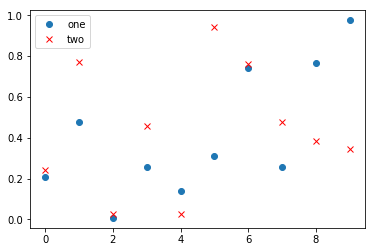

In [64]:
import pandas as pd
import numpy as np

d = {'one': np.random.rand(10), 'two': np.random.rand(10)}

df = pd.DataFrame(d)
%matplotlib inline
df.plot(style=['o', 'rx'])